# Estimate a non stationary covariance function

The objective of this use case is to estimate $C$ from several
fields generated by the process $X$. We suppose that the process
is not stationary.

In the following example, we illustrate the estimation of the non stationary covariance model
$C : \mathcal{D} \times [-4, 4] \rightarrow \mathbb{R}$ defined by:

$$\begin{aligned} \displaystyle C(s,t) = \exp\left(-\dfrac{4|s-t|}{1+s^2+t^2}\right)\end{aligned}$$

The domain $\mathcal{D}$ is discretized on a mesh $\mathcal{M}$ which is a time grid with 64 points.
We build a normal process $X: \Omega \times [-4, 4]  \rightarrow \mathbb{R}$ with zero mean and
$C$ as covariance function.
We discretize the covariance model $C$ using $C(t_k, t_\ell)$ for each $(t_k, t_\ell)\in \mathcal{M} \times \mathcal{M}$.
We get a $N=10^3$ fields from the process $X$ from wich we estimate the covariance model $C$.

We use the object *NonStationaryCovarianceModelFactory* which creates a *UserDefinedCovarianceModel*.

In [1]:
from __future__ import print_function
import math as m
import openturns as ot

In [2]:
# Create the time grid
t0 = -4.0
tmax = 4.0
N = 64
dt = (tmax - t0) / N
tgrid = ot.RegularGrid(t0, dt, N)

In [3]:
# Create the covariance function at (s,t)
def C(s, t):
    return m.exp(-4.0 * abs(s - t) / (1 + (s * s + t * t)))

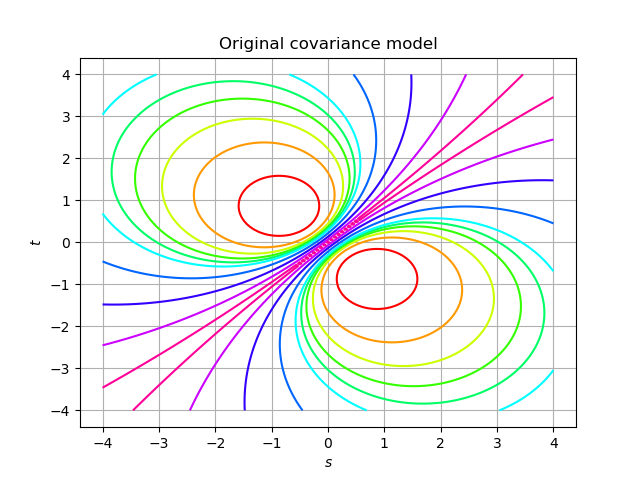

In [4]:
# Draw...
def f(X):
    s, t = X
    return [C(s, t)]

func = ot.PythonFunction(2, 1, f)
func.setDescription(['$s$', '$t$', '$cov$'])
graph = func.draw([t0] * 2, [tmax] * 2)
graph.setTitle('Original covariance model')
graph.setLegendPosition('')
graph

In [5]:
# Create data from a non stationary normal process Omega * [0,T]--> R

# Create the collection of HermitianMatrix
covariance = ot.CovarianceMatrix(N)
for k in range(N):
    s = tgrid.getValue(k)
    for l in range(k + 1):
        t = tgrid.getValue(l)
        covariance[k, l] = C(s, t)
        
covmodel = ot.UserDefinedCovarianceModel(tgrid, covariance)

In [6]:
# Create the normal process with that covariance model
# based on the mesh tgrid
process = ot.GaussianProcess(covmodel, tgrid)

# Get a sample of fields from the process
N = 1000
sample = process.getSample(N)

In [7]:
# The covariance model factory
factory = ot.NonStationaryCovarianceModelFactory()

# Estimation on a sample
estimatedModel = factory.build(sample)

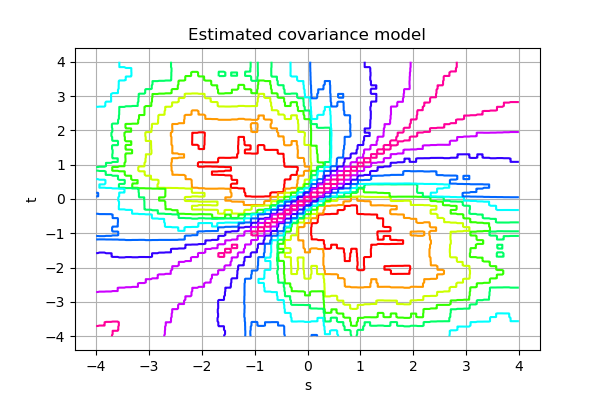

In [8]:
graph = estimatedModel.draw(0, 0, t0, tmax, 256, False)
graph.setTitle('Estimated covariance model')
graph.setLegendPosition('')
graph